In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/harinisuresh/.virtualenvs/test_cases/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [22]:
new_classes = {
    0: 0,
    1: 1,
    2: 0,
    3: 2,
    4: 3,
    5: 4,
    6: 0,
    7: 5,
    8: 6,
    9: 7 
}

In [23]:
class_names = {
    0: 'Top',
    1: 'Trouser',
    2: 'Dress',
    3: 'Coat',
    4: 'Sandal',
    5: 'Sneaker',
    6: 'Bag',
    7: 'Ankle boot'
}

In [66]:
def show_fashion_mnist_img(img_vec, label):
    plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_vec, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    plt.show()
    
def show_fashion_mnist_grid(imgs, labels, ids = [], preds = [], size=5):
    plt.figure(figsize=(10,10))
    for i in range(min(size*size, len(imgs))):
        plt.subplot(size,size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i], cmap=plt.cm.binary)
        if labels: 
            if len(ids) > 0:
                plt.xlabel(class_names[labels[i]] + " (%i)" % ids[i])
            elif len(preds) > 0:
                plt.xlabel(class_names[labels[i]] + " (pred: %s)" % class_names[preds[i]])
            else: 
                plt.xlabel(class_names[labels[i]])
    plt.show()

In [25]:
def load_fashion_mnist_data():
    fashion_mnist_train = np.loadtxt('data/fashion-mnist_train.csv', delimiter=',', skiprows=1)
    fashion_mnist_test = np.loadtxt('data/fashion-mnist_test.csv', delimiter=',', skiprows=1)
    fashion_mnist_train_y = np.array([new_classes[x] for x in fashion_mnist_train[:, 0]])
    fashion_mnist_train_x = (fashion_mnist_train[:, 1:].reshape(-1,28,28)) / 255.0
    fashion_mnist_test_y = np.array([new_classes[x] for x in fashion_mnist_test[:, 0]])
    fashion_mnist_test_x = (fashion_mnist_test[:, 1:].reshape(-1,28,28)) / 255.0
    
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(fashion_mnist_train_x[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[fashion_mnist_train_y[i]])
    plt.show()

    return fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y

In [26]:
def get_fashion_mnist_model():
    visible = Input(shape=(28,28))
    flattened = Flatten()(visible)
    hidden = Dense(128, activation='relu')(flattened)
    output = Dense(10, activation='softmax')(hidden)
    model = Model(inputs=visible, outputs=output)
    emb_model = Model(inputs=visible, outputs=hidden)

    return emb_model, model

def train_fashion_mnist_model(model, train_images, train_labels): 
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)


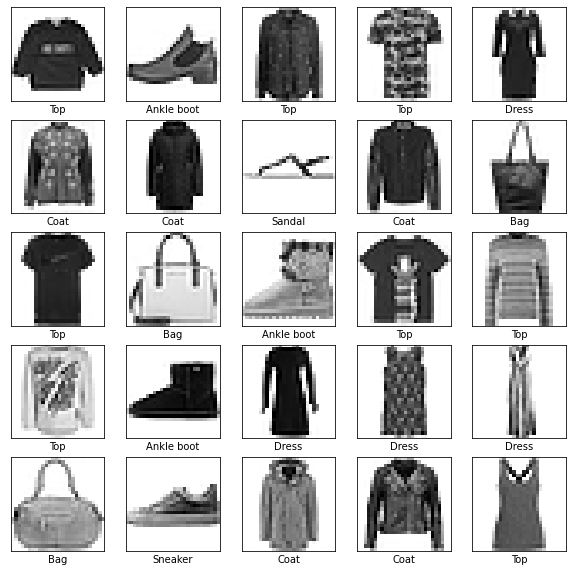

In [27]:
train_images, train_labels, test_images, test_labels = load_fashion_mnist_data()

In [28]:
emb_model, model = get_fashion_mnist_model()

In [29]:
train_fashion_mnist_model(model, train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 2s 765us/step - loss: 0.4646 - accuracy: 0.8346
Epoch 2/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.2560 - accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.2209 - accuracy: 0.9184
Epoch 4/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1987 - accuracy: 0.9253
Epoch 5/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.1874 - accuracy: 0.9318
Epoch 6/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1725 - accuracy: 0.9367
Epoch 7/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.1663 - accuracy: 0.9368
Epoch 8/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.1557 - accuracy: 0.9415
Epoch 9/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.1494 - accuracy: 0.9425
Epoch 10/10
1875/1875 [==============================] - 2s 816u

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1912 - accuracy: 0.9327

Test accuracy: 0.932699978351593


In [31]:
embeddings = emb_model.predict(test_images)

In [32]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
acc = test_labels == predictions

In [33]:
incorrect_idx = np.where(acc == False)[0]
correct_idx = np.where(acc == True)[0]

true_labels_for_incorrect_preds = test_labels[incorrect_idx]
incorrect_preds = predictions[incorrect_idx]

true_labels_for_correct_preds = test_labels[correct_idx]
correct_preds = predictions[correct_idx]

In [34]:
incorrect_embs = embeddings[incorrect_idx]
incorrect_images = test_images[incorrect_idx]

In [35]:
np.array([true_labels_for_incorrect_preds, incorrect_preds]).transpose().shape

(673, 2)

In [36]:
np.savetxt('incorrect_embs', incorrect_embs.reshape(incorrect_embs.shape[0], -1), delimiter='\t')

In [37]:
np.savetxt('inc_labels', np.array([true_labels_for_incorrect_preds, incorrect_preds]).transpose(), 
          delimiter='\t', header='true\tpred')

Text(0, 0.5, 'Error Rate')

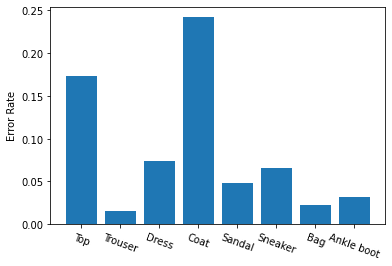

In [38]:
inc_counts = np.unique(true_labels_for_incorrect_preds, return_counts=True)
plt.bar(inc_counts[0], inc_counts[1]/1000.)
plt.xticks(inc_counts[0], [class_names[x] for x in inc_counts[0]], rotation=-20);
plt.ylabel("Error Rate")

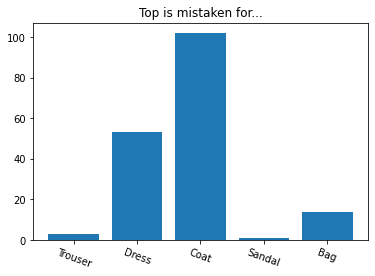

In [39]:
class_to_look_at = 0
incorrect_idx_in_class = incorrect_idx[true_labels_for_incorrect_preds == class_to_look_at]
correct_idx_in_class = correct_idx[true_labels_for_correct_preds == class_to_look_at]
incorrect_preds_in_class = incorrect_preds[true_labels_for_incorrect_preds == class_to_look_at]
mistaken_classes = np.unique(incorrect_preds_in_class, return_counts=True)
plt.bar(range(len(mistaken_classes[0])), mistaken_classes[1])
plt.xticks(range(len(mistaken_classes[0])), [class_names[x] for x in mistaken_classes[0]], rotation=-20);
plt.title("%s is mistaken for..." % class_names[class_to_look_at]);

Top mistaken for Trouser


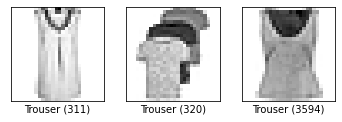

Top mistaken for Dress


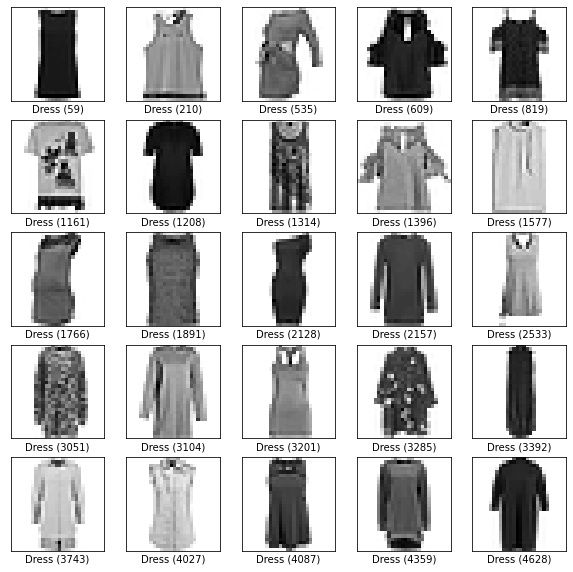

Top mistaken for Coat


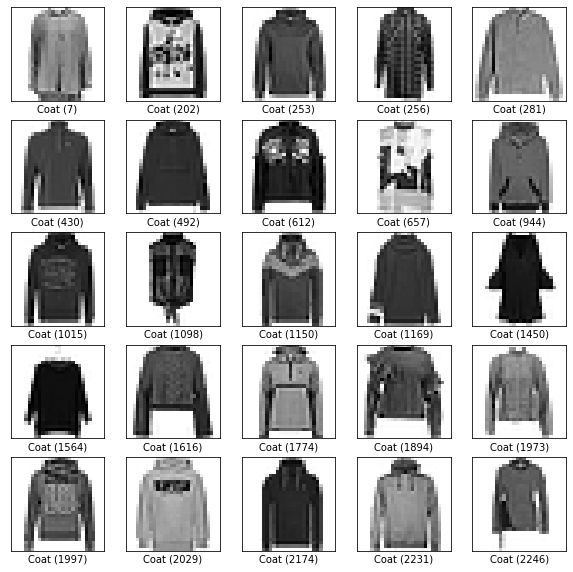

Top mistaken for Sandal


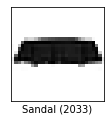

Top mistaken for Bag


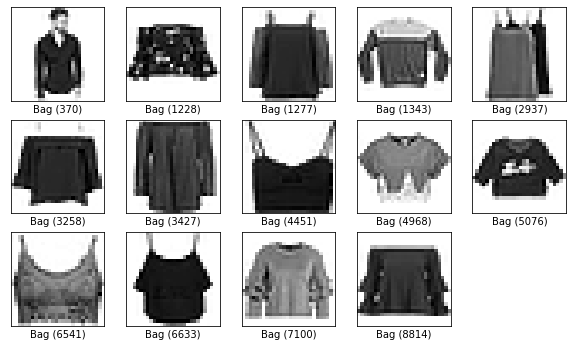

In [40]:
for c in mistaken_classes[0]:    
    print("%s mistaken for %s" % (class_names[class_to_look_at], class_names[c]))
    show_fashion_mnist_grid(test_images[incorrect_idx_in_class[incorrect_preds_in_class == c]], 
                            incorrect_preds_in_class[incorrect_preds_in_class == c],
                            incorrect_idx_in_class[incorrect_preds_in_class == c])

In [61]:
mistaken_bags = test_images[incorrect_idx_in_class[incorrect_preds_in_class == 8]][1:]
boxy_shirts = test_images[[858, 1228, 1277, 3258,7983,8688,8814]]
shirts_with_straps = test_images[[2937,4451,6541,7755]]
shirts_with_straps_2 = test_images[[2937,4451,6541,7755,1277,6633,9384,3548,4432,9483,7766]]
# shirts_with_two_stripes = test_images[[7635, 9155]]

In [42]:
def euclidean_distance(vec_a, vec_b):
    return np.linalg.norm(vec_a - vec_b) 

In [43]:
def get_nearest_embeddings(vec, neighbors):
    distances = [euclidean_distance(vec, x) for x in neighbors]
    sorted_neighbors = np.argsort(distances)
    return sorted_neighbors

In [53]:
examples_group = shirts_with_straps
mean_example_emb = np.mean(emb_model.predict(examples_group), axis=0)
all_shirt_embs = emb_model.predict(test_images[test_labels == class_to_look_at])
closest_embs = get_nearest_embeddings(mean_example_emb, all_shirt_embs)

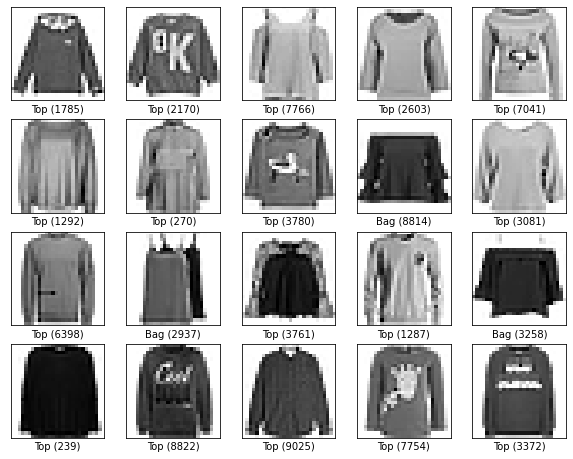

In [55]:
show_fashion_mnist_grid(test_images[test_labels == 0][closest_embs[25:45]], 
                        predictions[test_labels == 0][closest_embs[25:45]],
                        np.where(test_labels==0)[0][closest_embs[25:45]])

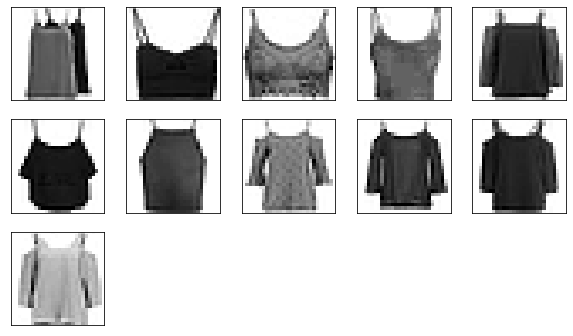

In [67]:
show_fashion_mnist_grid(
    shirts_with_straps_2,
    labels=None
)

In [59]:
def example_based_test(model, examples, expected_labels):
    preds = np.argmax(model.predict(examples), axis=1)
    overall_acc = np.sum(preds == expected_labels) / float(len(examples))
    print ("OVERALL ACCURACY: %.2f" % overall_acc)
    print ("FAILED ON THE FOLLOWING EXAMPLES:")
    show_fashion_mnist_grid(examples[np.where(preds != expected_labels)[0]], preds[np.where(preds != expected_labels)[0]])
    print ("PASSED ON THE FOLLOWING EXAMPLES:")
    show_fashion_mnist_grid(examples[np.where(preds == expected_labels)[0]], preds[np.where(preds == expected_labels)[0]])
    return overall_acc

OVERALL ACCURACY: 0.25
FAILED ON THE FOLLOWING EXAMPLES:


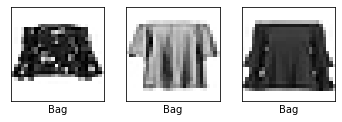

In [254]:
example_based_test(model, boxy_shirts, np.array([class_to_look_at]*len(boxy_shirts)));

OVERALL ACCURACY: 0.55
FAILED ON THE FOLLOWING EXAMPLES:


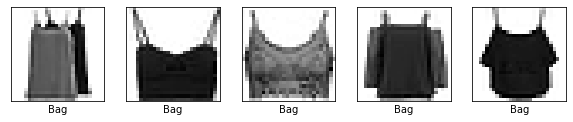

PASSED ON THE FOLLOWING EXAMPLES:


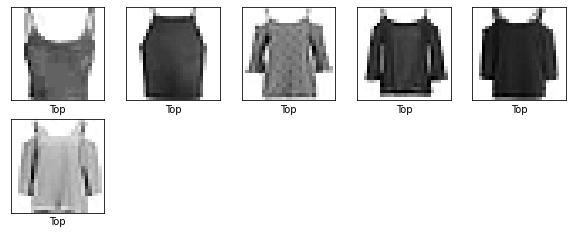

In [62]:
example_based_test(model, shirts_with_straps_2, np.array([class_to_look_at]*len(shirts_with_straps_2)));

In [422]:
from sklearn.cluster import KMeans

In [438]:
num_clusters = 12

In [439]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [440]:
kmeans.fit(incorrect_embs)

KMeans(n_clusters=12, random_state=0)

Cluster 0


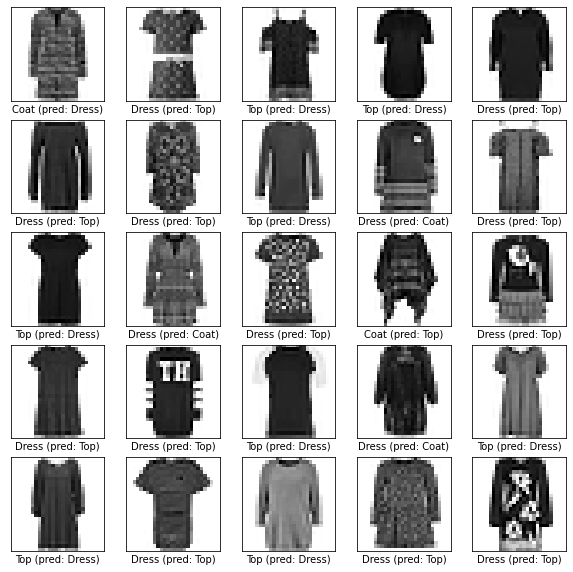

Cluster 1


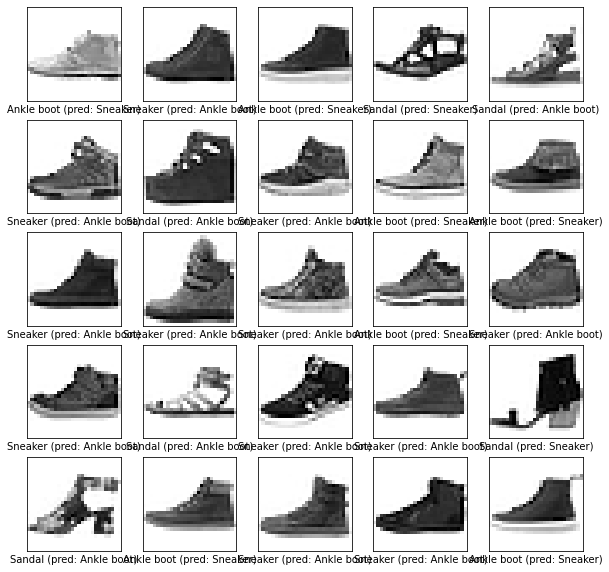

Cluster 2


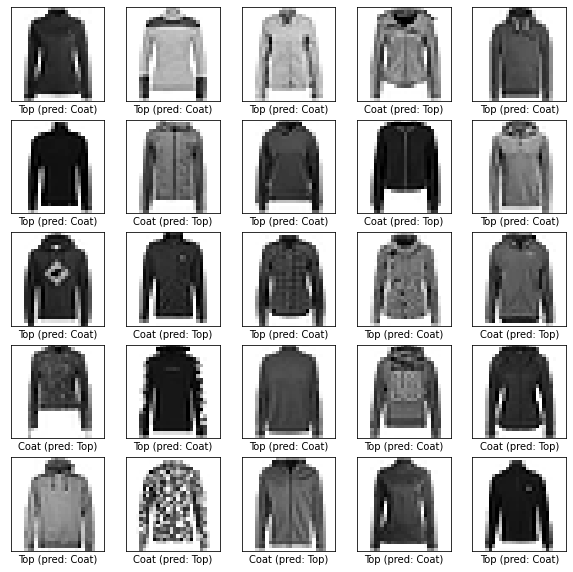

Cluster 3


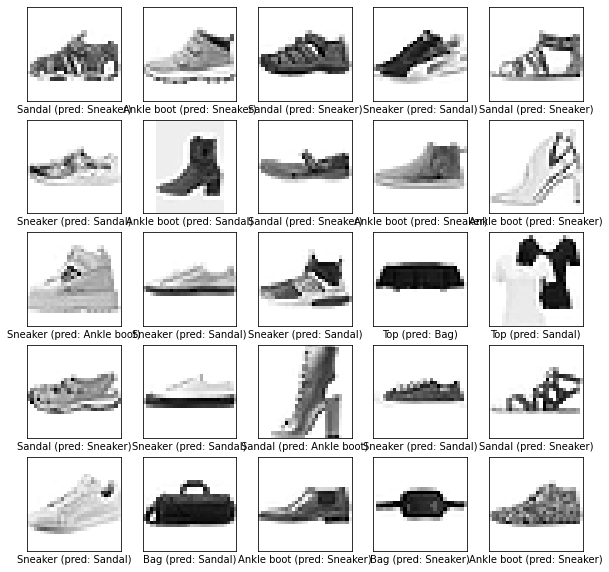

Cluster 4


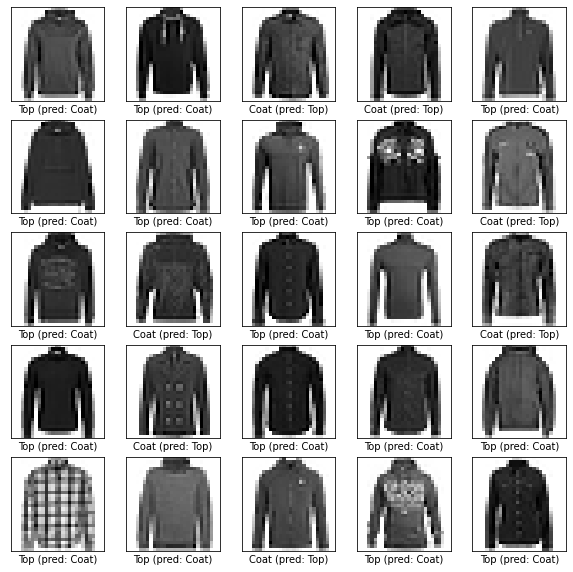

Cluster 5


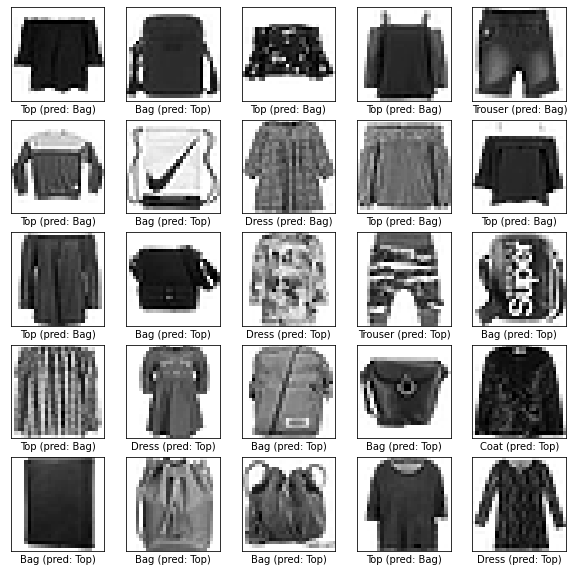

Cluster 6


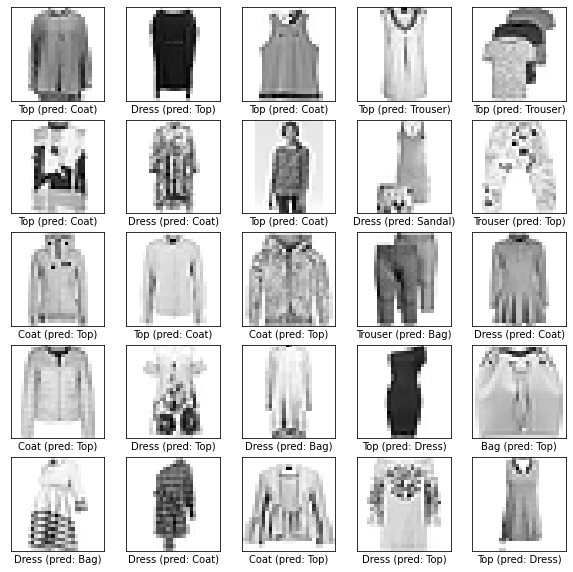

Cluster 7


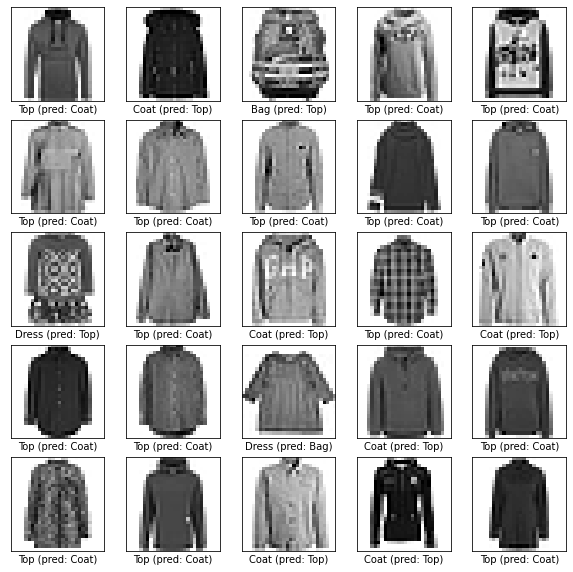

In [441]:
for l in range(8):
    examples_in_cluster = np.where(kmeans.labels_ == l)
    images = incorrect_images[examples_in_cluster]
    preds = incorrect_preds[examples_in_cluster]
    labels = true_labels_for_incorrect_preds[examples_in_cluster]
    print("Cluster %i" % l)
    show_fashion_mnist_grid(images, labels, preds=preds)

In [ ]:
# closest example that it got correct
# mask out a user-defined circled area -- does the diff b/w this and the original embedding correspond to something about the masked area? 



In [361]:
def get_diff_vector(test_img):
    test_img_masked = test_img.copy()
    test_img_masked[0:6] = 0
    masked_emb = emb_model.predict(np.expand_dims(test_img_masked,0))
    orig_emb = emb_model.predict(np.expand_dims(test_img,0))
    v = orig_emb - masked_emb
    v = v.flatten()
    return v

In [362]:
v = []
for img in shirts_with_straps_2:
    v.append(get_diff_vector(img))

v = np.mean(np.array(v),axis=0)

In [363]:
v_norm = np.sqrt(sum(v**2))

In [364]:
test_embeddings = emb_model.predict(test_images)

In [365]:
projections = [np.sqrt(sum(((np.dot(u, v)/v_norm**2)*v)**2)) for u in test_embeddings]
shirt_idx = np.where(test_labels == 6)

In [366]:
idx = np.array(projections).argsort()[::-1]

In [367]:
idx = [x for x in idx if x in shirt_idx[0]]

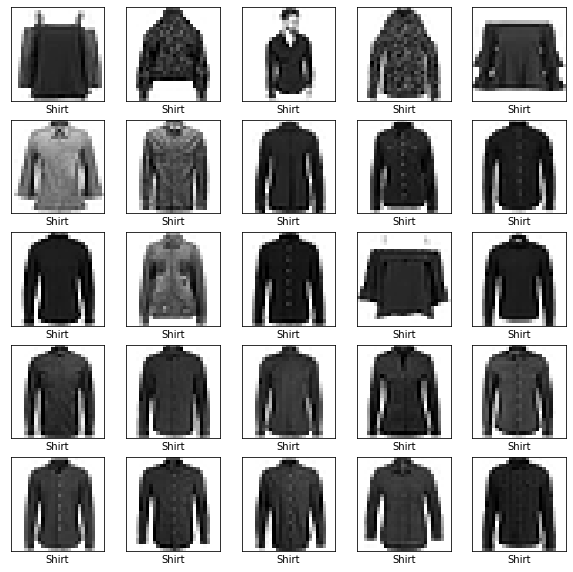

In [368]:
show_fashion_mnist_grid(test_images[idx], test_labels[idx])

In [291]:
(np.dot(u, v)/v_norm**2)*v

array([ 0.        ,  0.        ,  0.01872783,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.02485588,  0.        ,  0.        ,
        0.04124622,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02088052,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.4204663 ,  0.        , -0.02355124,  0.03353672,  0.        ,
       -0.00342972,  0.        , -0.11679426,  0.        ,  0.        ,
        0.        , -0.08217572,  0.        ,  0.        , -0.43

True Label:  Shirt


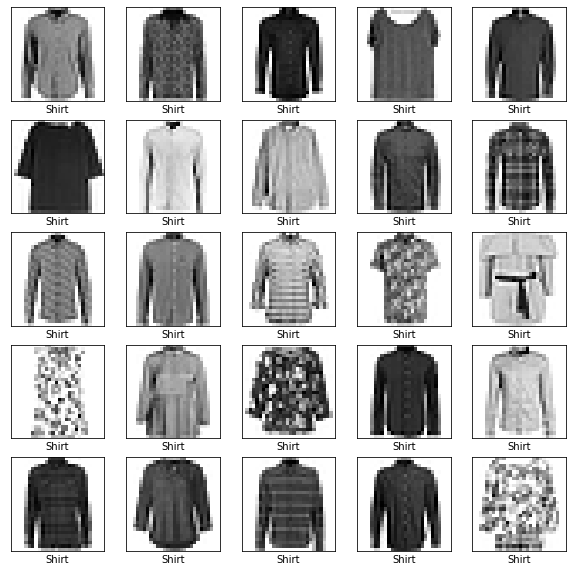

In [114]:
print("True Label: ", class_names[class_to_look_at])
correct_imgs = test_images[correct_idx_in_class]
show_fashion_mnist_grid(test_images[correct_idx_in_class], [class_to_look_at]*len(correct_imgs))

In [2]:
CATEGORICAL_VARS_TO_KEEP = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country']
CONTINUOUS_VARS_TO_KEEP = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
LABEL_VAR = 'income'
MIN_MAX_DICT = dict()

def load_adult_data():
    adult_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                    'hours-per-week', 'native-country', 'income']

    adult_train = pd.read_csv('data/adult.data', header=None, names=adult_labels)
    adult_test = pd.read_csv('data/adult.test', header=None, names=adult_labels, skiprows=1)

    adult_train['native-country'] = adult_train.apply(lambda x: native_country_compress(x['native-country'].strip()), axis=1) 
    adult_test['native-country'] = adult_test.apply(lambda x: native_country_compress(x['native-country'].strip()), axis=1)

    for var in CONTINUOUS_VARS_TO_KEEP:
        MIN_MAX_DICT[var] = [np.min(adult_train[var]), np.max(adult_train[var])]
        adult_train[var] = normalize(adult_train[var], MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1])
        adult_test[var] = normalize(adult_test[var], MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1])
    
    adult_train_x = adult_train[CONTINUOUS_VARS_TO_KEEP + CATEGORICAL_VARS_TO_KEEP]
    adult_test_x = adult_test[CONTINUOUS_VARS_TO_KEEP + CATEGORICAL_VARS_TO_KEEP]
    adult_train_y = adult_train[LABEL_VAR].apply(lambda x: encode_label(x))
    adult_test_y = adult_test[LABEL_VAR].apply(lambda x: encode_label(x))
    
    return adult_train_x, adult_train_y, adult_test_x, adult_test_y

def encode_label(x):
    if x.strip(' .') == '<=50K':
        return 0 
    else: return 1
    
def normalize(series, var_min, var_max):
    return (series - var_min) / (var_max - var_min)

def unnormalize(x, min_val, max_val, return_rounded=True):
    result = (x * (max_val - min_val)) + min_val
    if return_rounded: return np.round((x * (max_val - min_val)) + min_val)
    return result 

def native_country_compress(x):
    if x in ['England', 'Germany', 'Greece', 'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 'Hungary', 
             'Scotland', 'Yugoslavia', 'Holand-Netherlands']:
        return 'Europe'
    elif x in ['Puerto-Rico', 'Outlying-US(Guam-USVI-etc)', 'Cuba', 'Honduras', 'Jamaica', 
             'Dominican-Republic', 'Haiti', 'Guatemala', 'Nicaragua', 'El-Salvador', 'Trinadad&Tobago']: 
        return 'Central-America'
    elif x in ['Cambodia', 'India', 'Japan', 'China', 'Philippines', 'Iran', 'Vietnam', 'Laos', 
               'Taiwan', 'Thailand', 'Hong']:
        return 'Asia'
    elif x in ['Ecuador', 'Columbia', 'Peru']: 
        return 'South America'
    else: return x
    
def categorical_to_onehot(df):
    return pd.get_dummies(df, columns = CATEGORICAL_VARS_TO_KEEP)

def get_adult_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(train_x.shape[1])),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')    
    ])
    return model

def train_adult_model(model, train_data, train_labels): 
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model.fit(train_data, train_labels, epochs=5)


In [3]:
train_x_categorical, train_y, test_x_categorical, test_y = load_adult_data()

In [410]:
unnormalize(0.4, MIN_MAX_DICT['age'][0], MIN_MAX_DICT['age'][1])

46.0

In [12]:
age_selector = train_x_categorical['age'] < 0.4
train_x_categorical = train_x_categorical[age_selector]
train_y = train_y[age_selector]

In [13]:
# LOAD DATA
train_x = categorical_to_onehot(train_x_categorical)
test_x = categorical_to_onehot(test_x_categorical)

In [14]:
# TRAIN MODEL
model = get_adult_model()
train_adult_model(model, train_x, train_y)

Epoch 1/5
740/740 [==============================] - 1s 674us/step - loss: 0.3906 - accuracy: 0.8255
Epoch 2/5
740/740 [==============================] - 1s 705us/step - loss: 0.3015 - accuracy: 0.8619
Epoch 3/5
740/740 [==============================] - 1s 677us/step - loss: 0.2843 - accuracy: 0.8695
Epoch 4/5
740/740 [==============================] - 1s 800us/step - loss: 0.2697 - accuracy: 0.8764
Epoch 5/5
740/740 [==============================] - 0s 666us/step - loss: 0.2717 - accuracy: 0.8762


In [15]:
# TEST ACCURACY
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

509/509 - 0s - loss: 0.3581 - accuracy: 0.8281

Test accuracy: 0.8280817866325378


In [16]:
PDP_LINES = dict()
ALL_ICE_LINES = dict()
CATEGORICAL_VAR_KEYS = dict()

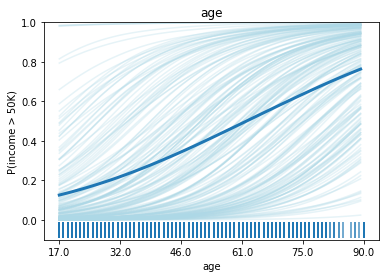

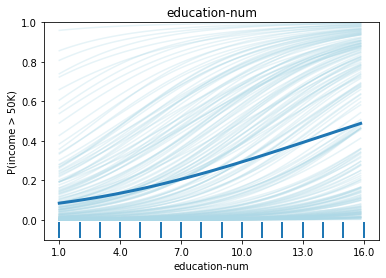

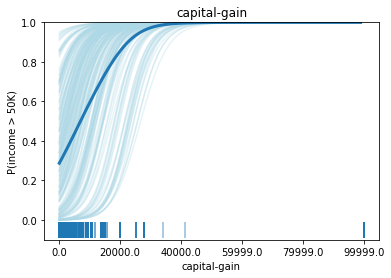

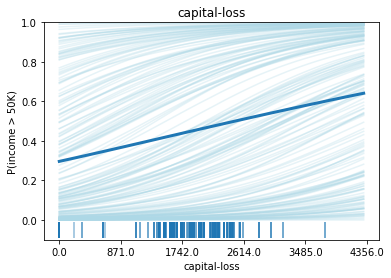

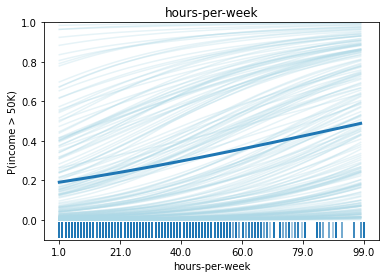

In [17]:
# PARTIAL DEPENDENCE PLOTS
for var in CONTINUOUS_VARS_TO_KEEP:
    data = test_x
    ice_lines = []

    original_col = data[var].copy()
    
    for val in np.arange(0, 1, 0.01):
        data[var] = val
        preds = model.predict(data)[:,0]
        ice_lines.append(preds)

    data[var] = original_col
    ice_lines = np.transpose(np.array(ice_lines))
    PDP_LINES[var] = np.mean(ice_lines, axis=0)
    
    plt.figure()
    random_sample = np.random.randint(0, ice_lines.shape[0], 200)
    for line in ice_lines[random_sample]: 
        plt.plot(line, alpha=0.3, color='lightblue')
    plt.plot(np.mean(ice_lines, axis=0), linewidth=3)    
    plt.vlines(x=original_col*100, ymin=-0.09, ymax=-0.01, alpha=0.5)
    xtick_locations = np.arange(0, 101, 20)
    plt.xticks(xtick_locations, 
               [unnormalize(tick, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1]) for tick in xtick_locations/100.0])
    plt.xlabel(var)
    plt.ylim(-0.1,1)
    plt.ylabel("P(income > 50K)")
    plt.title(var)
    plt.show()
    

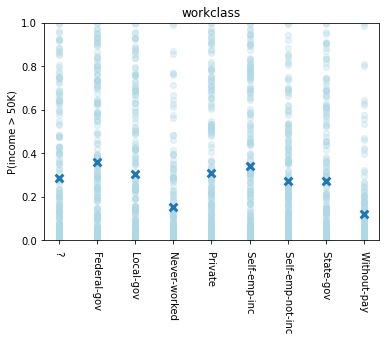

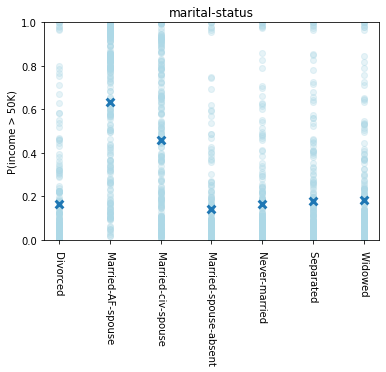

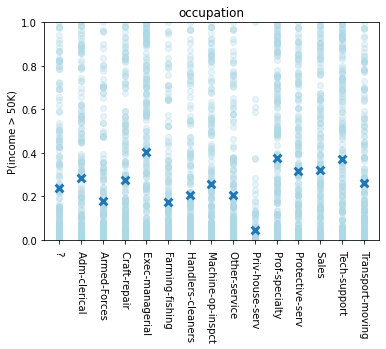

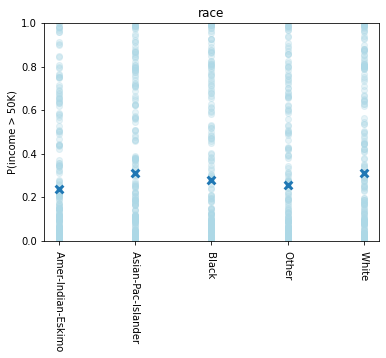

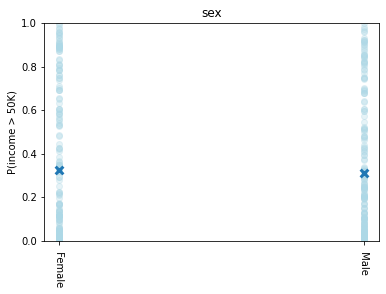

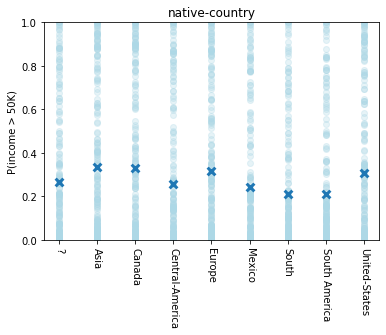

In [18]:
# PARTIAL DEPENDENCE PLOTS
for var in CATEGORICAL_VARS_TO_KEEP:
    data = test_x
    col_names = [c for c in data.columns if var in c]
    original_cols = data[col_names].copy()
    ice_lines = []

    for i in range(len(col_names)): 
        new_cols = np.zeros(original_cols.shape)
        new_cols[:,i] = 1
        data[col_names] = new_cols
        preds = model.predict(data)[:,0]
        ice_lines.append(preds)

    data[col_names] = original_cols
    ice_lines = np.transpose(np.array(ice_lines))
    PDP_LINES[var] = np.mean(ice_lines, axis=0)
    ALL_ICE_LINES[var] = ice_lines
    CATEGORICAL_VAR_KEYS[var] = [c.split('_')[1].strip() for c in col_names]
    
    plt.figure()
    for line in ice_lines[np.random.randint(0, ice_lines.shape[0], 200)]: 
        plt.scatter(range(len(line)), line, alpha=0.3, color='lightblue')
    plt.scatter(range(len(line)), np.mean(ice_lines, axis=0), s=60, linewidth=3, marker='x')
    plt.ylim(0,1)
    plt.xticks(range(len(line)), [item.split('_')[1] for item in col_names], rotation=-90)
    plt.ylabel("P(income > 50K)")
    plt.title(var)
    plt.show()

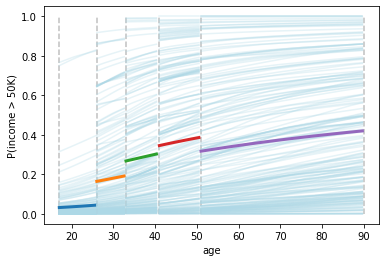

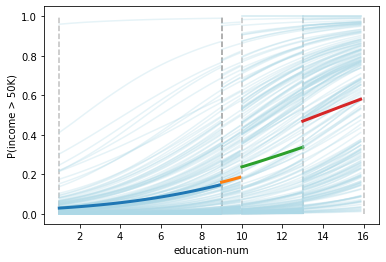

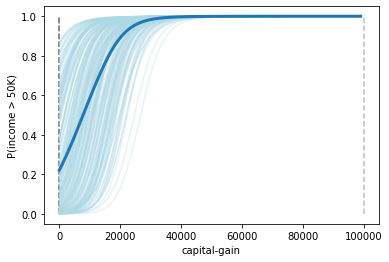

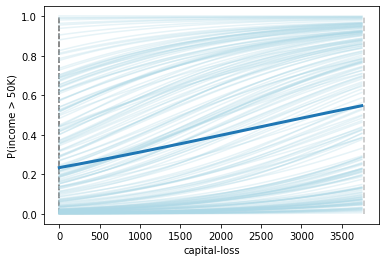

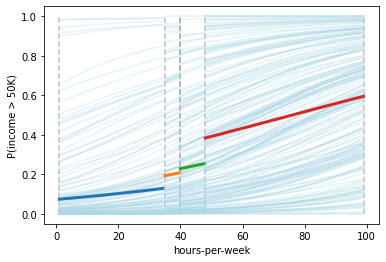

In [10]:
for var in CONTINUOUS_VARS_TO_KEEP:
    data = test_x
    quantile_thresholds = [0,0.2,0.4,0.6,0.8,1]
    quantiles = np.quantile(data[var], quantile_thresholds)
    x_values = [unnormalize(q, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1]) for q in quantiles]
    plt.figure()
    plt.ylabel("P(income > 50K)")
    plt.xlabel(var)
    plt.vlines(x_values, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='dashed')
    for i in range(len(quantiles) - 1): 
        ice_lines = []
        quantile_data = data[(data[var] >= quantiles[i]) & (data[var] <= quantiles[i + 1])].copy()
        
        normalized_vals = np.arange(quantiles[i], quantiles[i+1], 0.01)
        actual_vals = [unnormalize(q, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1], False) for q in normalized_vals]
        
        if len(normalized_vals) == 0: continue 
            
        for val in normalized_vals:
            quantile_data[var] = val
            preds = model.predict(quantile_data)[:,0]
            ice_lines.append(preds)
        
        ice_lines = np.transpose(np.array(ice_lines))
        random_sample = np.random.randint(0, ice_lines.shape[0], 200)
        for line in ice_lines[random_sample]: 
            plt.plot(actual_vals, line, alpha=0.3, color='lightblue')
            
        plt.plot(actual_vals, np.mean(ice_lines, axis=0), linewidth=3)
    plt.show()

In [11]:
def plot_actual_dist(var):
    new_df = pd.DataFrame({var: test_x[var], 'label': test_y})
    new_df[var] = np.around(new_df[var],2)
    means = new_df.groupby(var).mean()
    vals = [unnormalize(m, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1]) for m in means.index.values]
    plt.scatter(vals, means)
    plt.ylabel("P(income > 50K | %s)" % (var))
    plt.xlabel(var)
    plt.title("Actual P(income > 50K | %s) from test set" % var);
    
    plt.figure()
    hist_vals = [unnormalize(a, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1]) for a in new_df[var]]
    plt.hist(hist_vals)
    plt.title("Histogram of # examples / %s" % var);

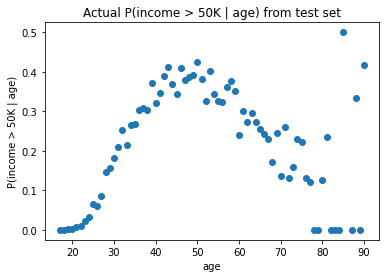

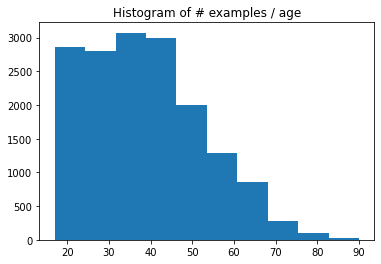

In [405]:
plot_actual_dist('age')

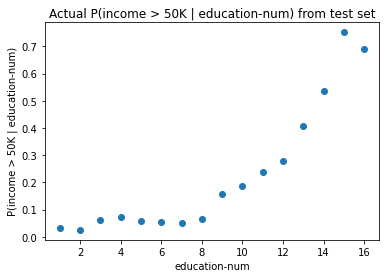

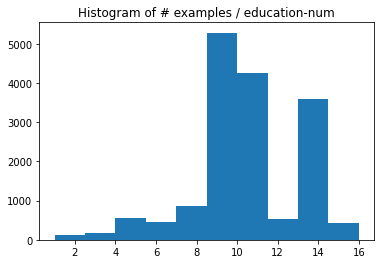

In [406]:
plot_actual_dist('education-num')

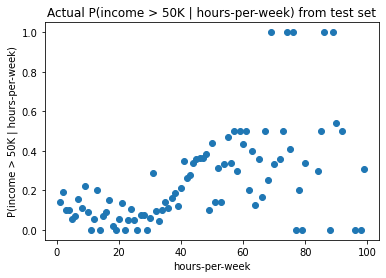

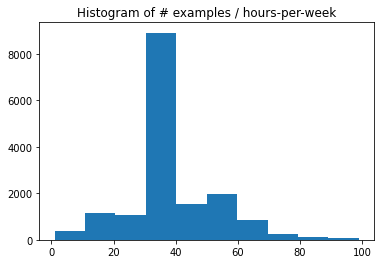

In [423]:
plot_actual_dist('hours-per-week')

In [20]:
# Only works for continous variables? 
def test_correlation(var, direction): 
    pdp = PDP_LINES[var]
    diff = np.diff(pdp)
    condition = (diff >=0) if direction == 'positive' else (diff <= 0)
    
    if not np.all(condition): 
        print("X %s CORRELATION TEST (%s) FAILED." % (direction.upper(), var))
    else: 
        print("✓ %s CORRELATION TEST (%s) PASSED." % (direction.upper(), var))
    
# Binary classifiction 
def test_invariance_aggregate(var, value_a, value_b, epsilon=0.01):
    pdp = PDP_LINES[var]
    idx_a = CATEGORICAL_VAR_KEYS[var].index(value_a)
    idx_b = CATEGORICAL_VAR_KEYS[var].index(value_b)
    value_a_result = pdp[idx_a]
    value_b_result = pdp[idx_b]
    
    if abs(value_a_result - value_b_result) > epsilon:
        print("X AGGREGATIVE INVARIANCE TEST (%s: %s vs %s) FAILED." % (var, value_a, value_b))
    else: 
        print("✓ AGGREGATIVE INVARIANCE TEST (%s: %s vs %s) PASSED." % (var, value_a, value_b))
        
# Binary classifiction 
def test_invariance_individual(var, value_a, value_b, epsilon=0.01):
    ice_lines = ALL_ICE_LINES[var]
    idx_a = CATEGORICAL_VAR_KEYS[var].index(value_a)
    idx_b = CATEGORICAL_VAR_KEYS[var].index(value_b)
    value_a_result = ice_lines[:, idx_a]
    value_b_result = ice_lines[:, idx_b]
    diff = value_a_result - value_b_result
    
    if not np.all(abs(diff) <= epsilon): 
        print("X INDIVIDUAL INVARIANCE TEST (%s: %s vs %s) FAILED." % (var, value_a, value_b))
    else: 
        print("✓ INDIVIDUAL INVARIANCE TEST (%s: %s vs %s) PASSED." % (var, value_a, value_b))
        
# continuous variables
def test_sensitivity_aggregate(var, delta, epsilon=0.1):
    pdp = PDP_LINES[var]
    selected_vals = np.arange(MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1], delta)
    normalized_vals = normalize(selected_vals, MIN_MAX_DICT[var][0], MIN_MAX_DICT[var][1])
    selected_idx = (np.round(normalized_vals, 2)*100).astype(int)
    selected_pdp = pdp[selected_idx]
    diff = np.diff(selected_pdp)

    if not np.all(abs(diff) <= epsilon): 
        print("X AGGREGATIVE SENSITIVITY TEST (%s) FAILED." % (var))
    else: 
        print("✓ AGGREGATIVE SENSITIVITY TEST (%s) PASSED." % (var))
    

In [317]:
test_correlation('age', 'positive')
test_correlation('hours-per-week', 'positive')
test_correlation('education-num', 'positive')

✓ POSITIVE CORRELATION TEST (age) PASSED.
✓ POSITIVE CORRELATION TEST (hours-per-week) PASSED.
✓ POSITIVE CORRELATION TEST (education-num) PASSED.


In [21]:
test_invariance_aggregate('race', 'Asian-Pac-Islander', 'White')
test_invariance_individual('race', 'Asian-Pac-Islander', 'White')

✓ AGGREGATIVE INVARIANCE TEST (race: Asian-Pac-Islander vs White) PASSED.
X INDIVIDUAL INVARIANCE TEST (race: Asian-Pac-Islander vs White) FAILED.


In [289]:
test_sensitivity_aggregate('age', 10) 

✓ AGGREGATIVE SENSITIVITY TEST (age) PASSED.


In [ ]:
# is there an age difference where it *is* "sensitive"

In [ ]:
# create a purposely "bad" model: 
# impute zeros? 
# imbalance data? 
# impute means? 
# only use younger people? 

In [ ]:
# tests about uncertainty? 

In [216]:
male_examples = test_x[test_x['sex_ Male'] == 1]
female_examples = test_x[test_x['sex_ Female'] == 1]

In [217]:
male_predictions = model.predict(test_x)
female_predictions = 

switched_male_examples = male_examples.copy()
switched_male_examples.loc[:, 'sex_ Male'] = 0
switched_male_examples.loc[:, 'sex_ Female'] = 1
switched_male_predictions = model.predict(switched_male_examples)
diff1 = male_predictions[:,0] - switched_male_predictions[:,0] 

In [219]:
female_predictions = model.predict(female_examples)
switched_female_examples = female_examples.copy()
switched_female_examples.loc[:, 'sex_ Female'] = 0
switched_female_examples.loc[:, 'sex_ Male'] = 1
switched_female_predictions = model.predict(switched_female_examples)
diff2 = switched_female_predictions[:,0] - female_predictions[:,0]

In [227]:
np.concatenate([diff1, diff2]).mean()

-0.00026076447

In [229]:
PDP_LINES['sex']

array([0.25083134, 0.25057057], dtype=float32)

In [230]:
0.25083134 - 0.25057057

0.00026077000000002126